In [2]:
import matplotlib.pyplot as plt
import numpy as np
from warnings import filterwarnings
import scipy.io
import os

In [3]:
pwd

'/rds/general/user/ip620/home/mri_fyp/brain/sequence'

In [4]:
# Define the folder where the file is saved
data_f = "images/TE47us_TI360ms"
# Define the file path
fov = 96
num = 32
restored_image = np.zeros((fov, fov, fov), dtype=np.float32)

for x in range(1,num):
    file_path = os.path.join(data_f, f'imagesharp{x}.txt')
    loaded_data = np.loadtxt(file_path, dtype=np.complex64)

    # Reshape it back to the original format
    reshaped_image = loaded_data.reshape(fov,fov,fov)  # Adjust shape if needed
    restored_image = restored_image + abs(reshaped_image)**2


loaded_data = np.sqrt(restored_image)   
print(loaded_data.shape)

(96, 96, 96)


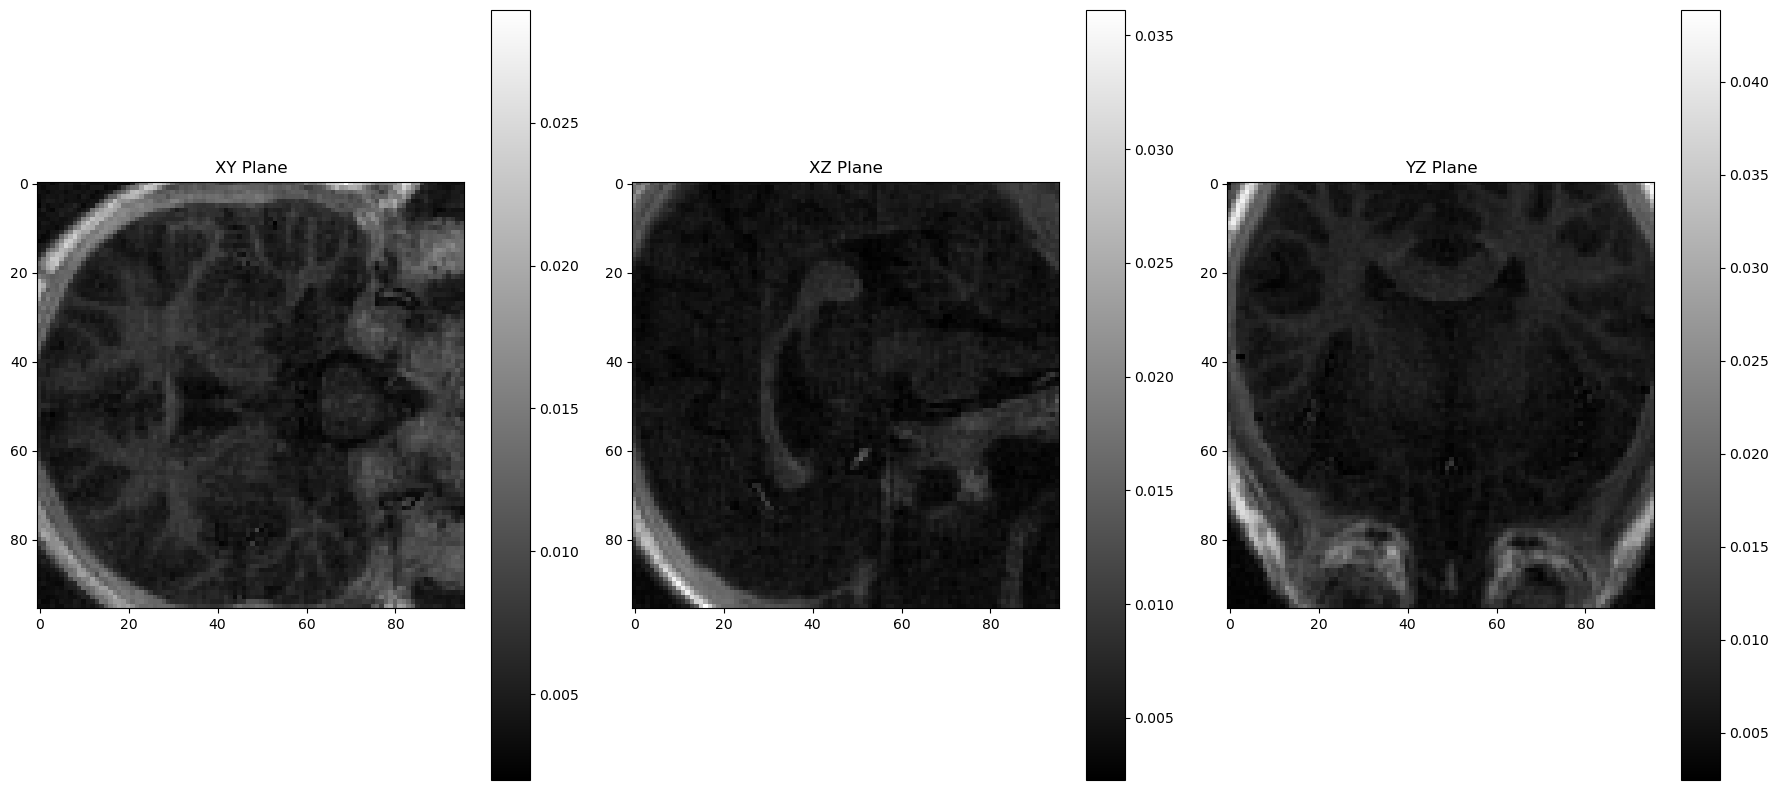

In [6]:
slice_idx = 48
# Extracting different middle slices
middle_sharp_slice_1 = (loaded_data[slice_idx, :, :])  # XY plane
middle_sharp_slice_2 = (loaded_data[:, slice_idx, :])  # XZ plane
middle_sharp_slice_3 = (loaded_data[:, :, slice_idx])  # YZ plane

fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# Plot each slice
titles = ["XY Plane", "XZ Plane", "YZ Plane"]
slices = [middle_sharp_slice_1, middle_sharp_slice_2, middle_sharp_slice_3]

for ax, data, title in zip(axes, slices, titles):
    im = ax.imshow(data, cmap='gray')
    ax.set_title(title)
    fig.colorbar(im, ax=ax)

plt.tight_layout()
# fig.savefig("middle_sharp_slices.png", bbox_inches='tight')
plt.show()

# Save it as a .mat file
# scipy.io.savemat("im_data_ste.mat", {"image_full_3d_ste": loaded_data})